In [13]:
import sys
import geopandas as gpd      # !{sys.executable} -m pip install geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
!python3 --version

In [17]:
# geo_df = geopandas.read_file("data/maps/usgeojson/gz_2010_us_040_00_5m.json")
# geo_df.head()
geo_df = gpd.read_file("data/maps/states_21basic/states.shp")
geo_df["STATE_FIPS"] = geo_df["STATE_FIPS"].astype(np.int64)
# geo_df.head()
# geo_df.dtypes
# geo_df.plot()

In [18]:
df = pd.read_csv("data/uspop-nst-2018.csv", header=0)
df = df[['STATE_FIPS','POP_2018']]
# df.dtypes
# df.head()

In [19]:
merged = geo_df.join(df.set_index("STATE_FIPS"), on="STATE_FIPS")
merged.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,POP_2018
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",1420491.0
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",7535591.0
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",1062305.0
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",1338404.0
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",760077.0


<AxesSubplot:>

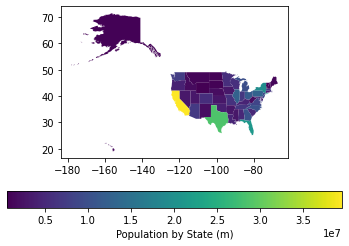

In [25]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
merged.plot(column='POP_2018',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by State (m)",
                        'orientation': "horizontal"})

In [ ]:
# merged.plot(column='POP_2018');
# cax = divider.append_axes("right", size="5%", pad=0.1)
# merged.plot(column='POP_2018', ax=ax, legend=True, cax=cax)

# fig.savefig("leaddistribution.png", dpi=300)